In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform  = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,),(0.5,))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!mkdir MNISTdata

In [ ]:
%cd MNISTdata

/content/drive/MyDrive/MNISTdata


In [ ]:
!mkdir train
!mkdir validation

In [ ]:
trainset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/train/',download=False,train=True,transform=transform)
valset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/validation/',download=False,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28]) tensor(1.)
torch.Size([64])


In [ ]:
lab = torch.zeros(2,2)
lab

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
labels

tensor([3, 2, 0, 8, 4, 3, 2, 2, 2, 8, 8, 6, 7, 2, 0, 7, 3, 6, 9, 7, 2, 4, 9, 5,
        4, 3, 0, 2, 2, 8, 0, 9, 5, 4, 5, 8, 5, 0, 2, 5, 9, 7, 7, 1, 2, 7, 9, 8,
        8, 6, 9, 2, 5, 0, 0, 7, 2, 7, 9, 3, 4, 9, 7, 9])

In [ ]:
lab = torch.zeros(2,labels.shape[0])
lab[0,:] = labels
for i in range(labels.shape[0]):
    lab[0,i] = labels[i]
    lab[1,i] = 1

In [ ]:
lab

tensor([[3., 2., 0., 8., 4., 3., 2., 2., 2., 8., 8., 6., 7., 2., 0., 7., 3., 6.,
         9., 7., 2., 4., 9., 5., 4., 3., 0., 2., 2., 8., 0., 9., 5., 4., 5., 8.,
         5., 0., 2., 5., 9., 7., 7., 1., 2., 7., 9., 8., 8., 6., 9., 2., 5., 0.,
         0., 7., 2., 7., 9., 3., 4., 9., 7., 9.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

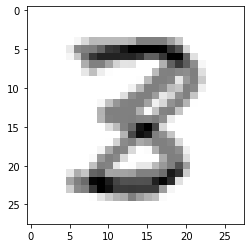

In [ ]:
plt.imshow((images[0]+images[1]).numpy().squeeze(),cmap='gray_r')

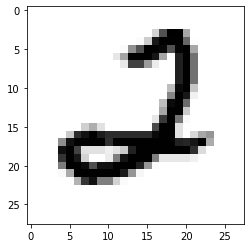

In [ ]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 11

In [ ]:
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=11, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
#print(images.shape)
logps = model(images)
loss = criterion(logps,labels)
print('Before back pass: ',model[0].weight.grad)
loss.backward()
print('After ',model[0].weight.grad)


Before back pass:  None
After  tensor([[-9.5139e-06, -9.5139e-06, -9.5139e-06,  ..., -9.5139e-06,
         -9.5139e-06, -9.5139e-06],
        [-3.9178e-04, -3.9178e-04, -3.9178e-04,  ..., -3.9178e-04,
         -3.9178e-04, -3.9178e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-7.9936e-04, -7.9936e-04, -7.9936e-04,  ..., -7.9936e-04,
         -7.9936e-04, -7.9936e-04],
        [-4.1806e-04, -4.1806e-04, -4.1806e-04,  ..., -4.1806e-04,
         -4.1806e-04, -4.1806e-04],
        [-3.6436e-03, -3.6436e-03, -3.6436e-03,  ..., -3.6436e-03,
         -3.6436e-03, -3.6436e-03]])


In [ ]:
optimizer = optim.SGD(model.parameters(),lr = 0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        #lab = torch.zeros(labels.shape[0],2)
        #lab[:,0] = labels
        for i in range(1,6):
            images[5*i] = images[5*i] + images[5*i + 1]
            labels[5*i] = 10
        images = images.view(images.shape[0],-1)

        optimizer.zero_grad()
        output = model(images)
        print("output shape: ",output.shape)
        print("label shape: ",labels.shape)
        loss = criterion(output,labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e,running_loss/len(trainloader)))
print("\nTraining Time (in minutes) = ", (time()-time0)/60)       

output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([

KeyboardInterrupt: ignored

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        if i%5 == 0:
            img = (images[i]+images[i-1]).view(1, 784)
            labels[i] = 10
        else:
            
      
            img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9837


In [ ]:
dataiter = iter(valloader)
vimg,vlab = dataiter.next()
vlab[2]

tensor(6)

In [ ]:
img = (vimg[2]).view(1,784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
print(ps)
probab = list(ps.numpy()[0])
pred_label = probab.index(max(probab))
pred_label

tensor([[9.9985e-01, 3.5484e-06, 1.7004e-06, 1.0657e-06, 4.1744e-09, 1.2326e-04,
         1.6296e-07, 6.0311e-06, 1.2062e-07, 1.1772e-06, 1.5953e-05]])


0

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
      
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9771


In [ ]:
torch.save(model, '/content/drive/MyDrive/MNISTdata/my_mnist_model_with_11.pt') 

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import numpy as np

In [ ]:

class Encoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.enc1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2))  # b, 16, 5, 5

    self.enc2 = nn.Sequential(
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1))  # b, 8, 2, 2
  def forward(self,x):
    x=self.enc1(x)
    #print(x.shape)
    x=self.enc2(x)
    #print(x.shape)
    return x


class Decoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.dec1 = nn.Sequential(nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True))
    self.dec2 = nn.Sequential(nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True))
    self.dec3 = nn.Sequential(nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh())

  def forward(self,x):
    x=self.dec1(x)
    x=self.dec2(x)
    x=self.dec3(x)
    return x

class AutoEncoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.enc=Encoder(device).to(device = device)
    self.dec =Decoder(device).to(device = device)
  def forward(self,x):
    enc=self.enc(x)
    dec=self.dec(enc)
    return dec





In [ ]:
class Trainer:
  def __init__(self,trainset,valset):
    self.device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    self.model = AutoEncoder(self.device).to(device=self.device)
    self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001)
    self.trainset=trainset
    self.valset=valset
    self.train_loader = torch.utils.data.DataLoader(self.trainset,batch_size=64,shuffle=True,num_workers=2)
    self.val_loader = torch.utils.data.DataLoader(self.valset,batch_size=64,shuffle=True,num_workers=2)
    self.writer = SummaryWriter('/content/drive/MyDrive/MNISTdata/tblogs') 
  def train(self,epochs=10):
    self.model.train()
    step = 0
    for epoch in tqdm(range(epochs),unit="epochs"):
      loss_list =[]
      for images, labels in self.train_loader:
        imgs=images.to(self.device)
        pred = self.model(imgs)
        losses =self.loss(pred,imgs)
        self.optimizer.zero_grad()
        losses.backward()
        self.optimizer.step()
        
      
        loss_list.append(losses.item())
        if step%10 ==0:
          self.writer.add_scalar('Loss/train', np.array(loss_list).mean(),step)
      print(np.array(loss_list).mean())

  def loss(self,pred,target):
    return nn.MSELoss()(pred,target)
  
  def predict(self,x):
    self.model.eval()
    with torch.no_grad():
      pred = self.model(x)
    return pred 

In [ ]:
transform  = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))
                                ])

trainset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/train/',download=False,train=True,transform=transform)
valset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/validation/',download=False,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


In [ ]:
dataiter = iter(valloader)
images, labels = dataiter.next()

print(images.shape,images.min(),images.max())
print(labels.shape)

torch.Size([64, 1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([64])


In [ ]:

trainer = Trainer(trainset,valset)

In [ ]:

trainer.train(60)



  0%|          | 0/60 [00:00<?, ?epochs/s]

  2%|▏         | 1/60 [00:12<12:02, 12.24s/epochs]

0.09556191027768131




  3%|▎         | 2/60 [00:24<11:53, 12.31s/epochs]

0.09540037937891255




  5%|▌         | 3/60 [00:37<11:42, 12.33s/epochs]

0.09529360885749748




  7%|▋         | 4/60 [00:49<11:32, 12.37s/epochs]

0.09522708399749513




  8%|▊         | 5/60 [01:02<11:22, 12.41s/epochs]

0.09514994359315077




 10%|█         | 6/60 [01:14<11:09, 12.39s/epochs]

0.09501052567604254




 12%|█▏        | 7/60 [01:26<10:52, 12.31s/epochs]

0.09491425632699721




 13%|█▎        | 8/60 [01:38<10:39, 12.29s/epochs]

0.09476174576196081




 15%|█▌        | 9/60 [01:51<10:27, 12.30s/epochs]

0.09464668162437136




 17%|█▋        | 10/60 [02:03<10:15, 12.32s/epochs]

0.0946254873437795




 18%|█▊        | 11/60 [02:15<10:03, 12.33s/epochs]

0.0944909520590229




 20%|██        | 12/60 [02:28<09:52, 12.35s/epochs]

0.09450042964235297




 22%|██▏       | 13/60 [02:40<09:42, 12.39s/epochs]

0.09432821785971554




 23%|██▎       | 14/60 [02:53<09:29, 12.38s/epochs]

0.09423204608309244




 25%|██▌       | 15/60 [03:05<09:16, 12.37s/epochs]

0.0941311133695818




 27%|██▋       | 16/60 [03:18<09:11, 12.53s/epochs]

0.09408384992846294




 28%|██▊       | 17/60 [03:30<08:58, 12.52s/epochs]

0.09397007141317894




 30%|███       | 18/60 [03:43<08:43, 12.47s/epochs]

0.09397277982631472




 32%|███▏      | 19/60 [03:55<08:32, 12.49s/epochs]

0.09376240767903928




 33%|███▎      | 20/60 [04:07<08:16, 12.42s/epochs]

0.093667774375822




 35%|███▌      | 21/60 [04:20<08:01, 12.35s/epochs]

0.09363321956795162




 37%|███▋      | 22/60 [04:32<07:49, 12.35s/epochs]

0.09340216529204139




 38%|███▊      | 23/60 [04:44<07:36, 12.33s/epochs]

0.09340262796674202




 40%|████      | 24/60 [04:57<07:25, 12.36s/epochs]

0.0933793221773115




 42%|████▏     | 25/60 [05:09<07:11, 12.33s/epochs]

0.09323286238128442




 43%|████▎     | 26/60 [05:21<06:57, 12.29s/epochs]

0.09308813413037166




 45%|████▌     | 27/60 [05:33<06:44, 12.26s/epochs]

0.09307996607792657




 47%|████▋     | 28/60 [05:45<06:30, 12.22s/epochs]

0.09295420143713574




 48%|████▊     | 29/60 [05:58<06:19, 12.23s/epochs]

0.09294632666591388




 50%|█████     | 30/60 [06:10<06:06, 12.23s/epochs]

0.09285161130305038




 52%|█████▏    | 31/60 [06:22<05:53, 12.20s/epochs]

0.09275901483606173




 53%|█████▎    | 32/60 [06:34<05:40, 12.15s/epochs]

0.09270677103130802




 55%|█████▌    | 33/60 [06:46<05:28, 12.16s/epochs]

0.09264714162804678




 57%|█████▋    | 34/60 [06:58<05:16, 12.18s/epochs]

0.09253706555090734




 58%|█████▊    | 35/60 [07:11<05:05, 12.21s/epochs]

0.09239985488815856




 60%|██████    | 36/60 [07:23<04:54, 12.25s/epochs]

0.09247025710814544




 62%|██████▏   | 37/60 [07:36<04:43, 12.31s/epochs]

0.09239494208810425




 63%|██████▎   | 38/60 [07:48<04:31, 12.33s/epochs]

0.0923274687961983




 65%|██████▌   | 39/60 [08:00<04:18, 12.29s/epochs]

0.09224138480386754




 67%|██████▋   | 40/60 [08:13<04:06, 12.32s/epochs]

0.09219784525507041




 68%|██████▊   | 41/60 [08:25<03:53, 12.31s/epochs]

0.09215084067794052




 70%|███████   | 42/60 [08:37<03:41, 12.30s/epochs]

0.09202841560501279




 72%|███████▏  | 43/60 [08:49<03:29, 12.32s/epochs]

0.09206234014777741




 73%|███████▎  | 44/60 [09:02<03:16, 12.31s/epochs]

0.09203224766578501




 75%|███████▌  | 45/60 [09:14<03:03, 12.27s/epochs]

0.09188097803545658




 77%|███████▋  | 46/60 [09:26<02:51, 12.25s/epochs]

0.09185536602126763




 78%|███████▊  | 47/60 [09:38<02:38, 12.22s/epochs]

0.09173033296712425




 80%|████████  | 48/60 [09:50<02:26, 12.21s/epochs]

0.0917308063411128




 82%|████████▏ | 49/60 [10:03<02:14, 12.25s/epochs]

0.09163552379684407




 83%|████████▎ | 50/60 [10:15<02:02, 12.26s/epochs]

0.0916273468561264




 85%|████████▌ | 51/60 [10:27<01:49, 12.22s/epochs]

0.09158981910773686




 87%|████████▋ | 52/60 [10:39<01:37, 12.18s/epochs]

0.09144445034518425




 88%|████████▊ | 53/60 [10:51<01:25, 12.18s/epochs]

0.09139679774228952




 90%|█████████ | 54/60 [11:04<01:13, 12.21s/epochs]

0.09141925775579043




 92%|█████████▏| 55/60 [11:16<01:00, 12.18s/epochs]

0.09133668104087365




 93%|█████████▎| 56/60 [11:28<00:48, 12.18s/epochs]

0.09130367400772027




 95%|█████████▌| 57/60 [11:40<00:36, 12.19s/epochs]

0.09124290346622721




 97%|█████████▋| 58/60 [11:53<00:24, 12.21s/epochs]

0.09124582901851201




 98%|█████████▊| 59/60 [12:05<00:12, 12.20s/epochs]

0.09120099935958635




100%|██████████| 60/60 [12:17<00:00, 12.29s/epochs]

0.0912041702011882


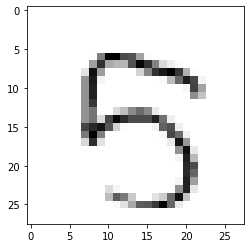

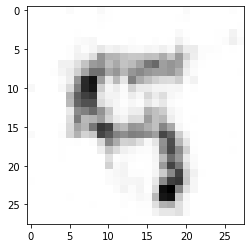

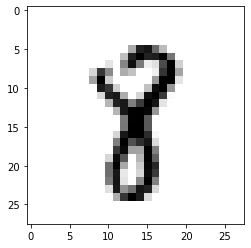

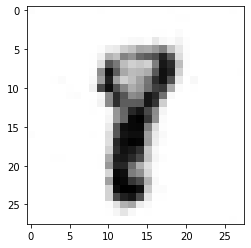

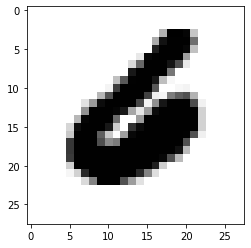

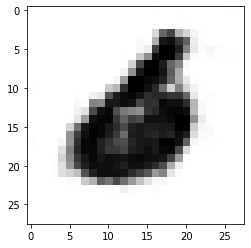

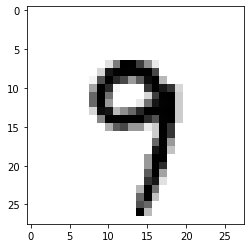

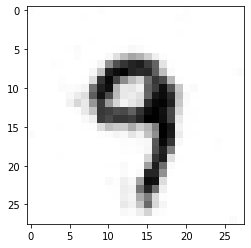

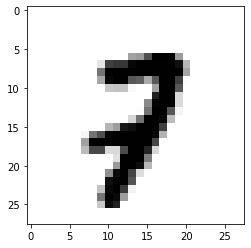

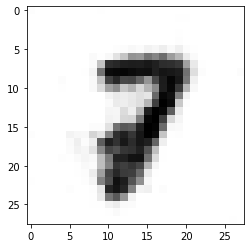

In [ ]:

pred =trainer.predict(images.to(device=trainer.device))
for i in range(5):
  id=i*10
  plt.figure()
  plt.imshow(images[id].numpy().squeeze(),cmap='gray_r')
  plt.figure()
  plt.imshow(pred[id].cpu().numpy().squeeze(),cmap='gray_r')

In [ ]:
class Attacker(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 =nn.Linear(32,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3=nn.Linear(32,11)
    self.softmax =nn.Softmax(dim=1)
  def forward(self,x):
    x=nn.Flatten()(x)
    x=nn.ReLU()(self.fc1(x))
    x=nn.ReLU()(self.fc2(x))
    x=self.softmax(self.fc3(x))
    return x

class GAN(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.attacker=Attacker().to(device)
    self.enc= Encoder(device).to(device)
  def forward(self,x):
    x=self.enc(x)
    x=self.attacker(x)
    return x

class GANTrainer:
  def __init__(self,trainset,valset,batch_sz=64):
      self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

      self.enc = Encoder(self.device).to(self.device)
      self.attacker= Attacker().to(self.device)

      self.optim_enc=torch.optim.AdamW(self.enc.parameters(),lr=0.001)
      self.optim_attack=torch.optim.AdamW(self.attacker.parameters(),lr=0.001)

      self.trainset=trainset
      self.valset=valset
      self.train_loader = torch.utils.data.DataLoader(self.trainset,batch_size=batch_sz,shuffle=True,num_workers=2)
      self.val_loader = torch.utils.data.DataLoader(self.valset,batch_size=batch_sz,shuffle=True,num_workers=2)
      self.batch_sz =batch_sz


  def attacker_loss(self,pred,labels):
      delta=0.01
      one_hot =torch.zeros_like(pred).to(self.device)
      one_hot.scatter_(1,labels.unsqueeze(1),1)
      loss =-torch.sum(torch.log(pred+delta)*one_hot)/self.batch_sz
      return loss

  def create_onehot(self,one_hot,labels):

      out = one_hot.detach().clone()
      for indx,val in enumerate(labels):

          if val == 10:
              out[indx] *= 0.
              out[indx][val] = 1.
          else :
              out[indx] *= 0.1
              out[indx][10] = 0.
      return out

  def enc_loss(self,pred,labels):

    # one_hot =torch.zeros_like(pred).to(self.device)
    # one_hot.scatter_(1,labels.unsqueeze(1),1)
    # delta=0.01
    # loss = -(torch.sum(torch.log(1-pred[:,-1]+delta)*(1-one_hot[:,-1]))+torch.sum(torch.log(1-pred[:,:-1]+delta)*one_hot[:,:-1])+torch.sum(torch.log(pred[:,-1]+delta)*one_hot[:,-1]))/self.batch_sz
    # return loss
    # -----------------------------------------------------------------------------
    # logps =pred
    # one_hot = torch.ones_like(logps).to(self.device)
    # one_hot = torch.tensor(self.create_onehot(one_hot,labels),requires_grad=True)

    #     #return torch.square(logps-one_hot)
    # loss = torch.sum(torch.square(logps-one_hot))/self.batch_sz
    #     #print(" function loss: ",loss)
    # return loss
    # -----------------------------------------------------------------------------
    logps = pred
    one_hot = torch.ones_like(logps).to(self.device)
    one_hot = torch.tensor(self.create_onehot(one_hot,labels),requires_grad=True)
    #print(one_hot)
    m = nn.Softmax(dim=-1)
    q = m(logps)
    eps = 1e-10
    #print(q)
    pq = one_hot*q
    # print(pq)
    # print(pq.shape)
    #loss = torch.sum(-torch.log(q+eps)*one_hot)/self.batch_sz
    loss = torch.sum(-torch.log(one_hot*q+eps))/self.batch_sz
    return loss

#   def test_model(self):

#     print("here")
#     total_nan = 0
#     total_no = 0
#     classified_nan = 0
#     classified_no = 0
#     classified_nan_false = 0
#     classified_no_false = 0
#     logits = []
#     for images,labels in self.valset :
#         for i in range(1,6):
#             images[5*i] = images[5*i] + images[5*i + 1]
#             total_nan += 1
#         total_no += images.shape[0] - 5
#         imgs = images.to(self.device)
#         labels = labels.to(self.device)
#         with torch.no_grad() :
#             z = self.enc(imgs)
#             preds = self.attacker(z).cpu().numpy()
#         for i in range(labels.shape[0]):

#             if np.argmax(preds[i]) == 10 and labels[i] == 10:

#                 classified_nan += 1
#             elif np.argmax(preds[i]) == 10 and labels[i] != 10:
#                 classified_nan_false += 1
#             elif np.argmax(preds[i]) == labels[i]:
#                 classified_no += 1
#             else:
#                 classifeid_no_fasle += 1
#     print(" Accuracy nan: {} Accuracy no: {}".format(classified_nan/total_nan,classified_no/total_no))
#     print(" total nan {} total no {} classified_nan {} classified_no {} classified_nan_false {} classified_no_false {}".format(
#             total_nan,total_no,classified_nan,classified_no,classified_nan_false,classified_no_false
#             ))




  
  def train(self,epochs=10,train_both=True):
    attack_train = not(train_both)
    for epoch in tqdm(range(epochs),unit="epochs"):
      step =0
      count =0
      loss_list_enc=[]
      loss_list_atk=[]
      for images, labels in self.train_loader:
        for i in range(1,6):
          images[5*i] = images[5*i] + images[5*i + 1]
          labels[5*i] = 10
        imgs=images.to(self.device)
        labels=labels.to(self.device)

        if not(attack_train):
          self.optim_enc.zero_grad()
          enc = self.enc(imgs)
          pred_enc = self.attacker(enc)
          enc_loss = self.enc_loss(pred_enc,labels)
          enc_loss.backward()
          self.optim_enc.step()
          loss_list_enc.append(enc_loss.item())
        else:
          self.optim_attack.zero_grad()
          enc = self.enc(imgs)
          pred_attack=self.attacker(enc.detach())
          attack_loss= self.attacker_loss(pred_attack,labels)
          attack_loss.backward()
          self.optim_attack.step()
          loss_list_atk.append(attack_loss.item())

        if train_both:
          count+=1
          if count==30 and attack_train:
            attack_train = False
            count =0
          elif count ==5 and not(attack_train):
            attack_train = True
            count =0
        else:
          attack_train=True
        
      print(np.array(loss_list_enc).mean() if train_both else "Enc fixed",np.array(loss_list_atk).mean())
    # def test_model(self):
        


#         print("here")
#         total_nan = 0
#         total_no = 0
#         classified_nan = 0
#         classified_no = 0
#         classified_nan_false = 0
#         classified_no_false = 0
#         logits = []
#         for images,labels in self.valset :
#             for i in range(1,6):
#                 images[5*i] = images[5*i] + images[5*i + 1]
#                 total_nan += 1
#             total_no += images.shape[0] - 5
#             imgs = images.to(self.device)
#             labels = labels.to(self.device)
#             with torch.no_grad() :
#                 z = self.enc(imgs)
#                 preds = self.attacker(z).cpu().numpy()
#             for i in range(labels.shape[0]):
#                 if np.argmax(preds[i]) == 10 and labels[i] == 10:
#                     classified_nan += 1
#                 elif np.argmax(preds[i]) == 10 and labels[i] != 10:
#                     classified_nan_false += 1
#                 elif np.argmax(preds[i]) == labels[i]:
#                     classified_no += 1
#                 else:
#                     classifeid_no_fasle += 1
#         print(" Accuracy nan: {} Accuracy no: {}".format(classified_nan/total_nan,classified_no/total_no))
#         print(" total nan {} total no {} classified_nan {} classified_no {} classified_nan_false {} classified_no_false {}".format(
#             total_nan,total_no,classified_nan,classified_no,classified_nan_false,classified_no_false
#             ))
    
  def train_attacker(self,epochs=10):
    
    for epoch in tqdm(range(epochs),unit="epochs"):
      step =0
      count =0
      loss_list=[]
      for images, labels in self.train_loader:
        for i in range(1,6):
          images[5*i] = images[5*i] + images[5*i + 1]
          labels[5*i] = 10
        imgs=images.to(self.device)
        labels=labels.to(self.device)
      
        pred = self.attacker(self.enc(imgs))

        losses =self.attacker_loss(pred,labels)
        self.optim_attack.zero_grad()
        self.optim_enc.zero_grad()
        losses.backward()
        self.optim_enc.step()
        self.optim_attack.step()

        loss_list.append(losses.item())
      print(np.array(loss_list).mean())
   


        

            


  
gantrainer =GANTrainer(trainset,valset)

In [ ]:
gantrainer.train(20)


  5%|▌         | 1/20 [00:16<05:22, 16.97s/epochs]

82.72451618335865 2.2838564585629912


 10%|█         | 2/20 [00:34<05:06, 17.00s/epochs]

82.72427626389724 2.2903027358916725


 15%|█▌        | 3/20 [00:51<04:49, 17.04s/epochs]

82.68165024977463 2.2013444142176373


 20%|██        | 4/20 [01:08<04:32, 17.02s/epochs]

82.58967825082632 2.033004696416383


 25%|██▌       | 5/20 [01:25<04:15, 17.01s/epochs]

82.58942372248723 2.0318700652016273


 30%|███       | 6/20 [01:42<03:58, 17.01s/epochs]

82.5892430818998 2.032002895775408


 35%|███▌      | 7/20 [01:59<03:40, 16.99s/epochs]

82.58920311560998 2.032264009855761


 40%|████      | 8/20 [02:16<03:24, 17.01s/epochs]

82.58918380737305 2.032016197348585


 45%|████▌     | 9/20 [02:33<03:07, 17.02s/epochs]

82.58916837252103 2.031990246902598


 50%|█████     | 10/20 [02:50<02:50, 17.03s/epochs]

82.58914519089919 2.0321070488431667


 55%|█████▌    | 11/20 [03:07<02:32, 16.98s/epochs]

82.5891130887545 2.03201560513808


 60%|██████    | 12/20 [03:24<02:16, 17.01s/epochs]

82.58912488497221 2.031787382641641


 65%|██████▌   | 13/20 [03:41<01:59, 17.01s/epochs]

82.5891378549429 2.031694073635753


 70%|███████   | 14/20 [03:58<01:41, 16.96s/epochs]

82.58910569411057 2.0319093164093425


 75%|███████▌  | 15/20 [04:14<01:24, 16.88s/epochs]

82.58909935584435 2.031694446902464


 80%|████████  | 16/20 [04:31<01:07, 16.93s/epochs]

82.58908943763146 2.031692680746022


 85%|████████▌ | 17/20 [04:48<00:50, 16.87s/epochs]

82.58910493117112 2.0315973177404687


 90%|█████████ | 18/20 [05:05<00:33, 16.89s/epochs]

82.58907946073091 2.03166351703429


 95%|█████████▌| 19/20 [05:22<00:16, 16.84s/epochs]

82.58907740666316 2.03167955754417


100%|██████████| 20/20 [05:39<00:00, 16.95s/epochs]

82.5890858576848 2.0316178772856692


In [ ]:
 gantrainer.test_model

AttributeError: ignored

In [ ]:
attk_state = gantrainer.attacker.state_dict()
enc_state = gantrainer.enc.state_dict()

In [ ]:
gantrainer.train(20,False)

  0%|          | 0/20 [00:00<?, ?epochs/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  5%|▌         | 1/20 [00:11<03:37, 11.45s/epochs]

nan 2.0318244255300777


 10%|█         | 2/20 [00:23<03:27, 11.52s/epochs]

nan 2.031702670715511


 15%|█▌        | 3/20 [00:34<03:14, 11.42s/epochs]

nan 2.030593406353424


 20%|██        | 4/20 [00:45<03:02, 11.39s/epochs]

nan 2.0297277783279988


 25%|██▌       | 5/20 [00:56<02:49, 11.29s/epochs]

nan 2.0280616959529136


 30%|███       | 6/20 [01:07<02:36, 11.20s/epochs]

nan 2.0272106051699184


 35%|███▌      | 7/20 [01:18<02:24, 11.13s/epochs]

nan 2.0258422607679103


 40%|████      | 8/20 [01:30<02:14, 11.23s/epochs]

nan 2.024081849848538


 45%|████▌     | 9/20 [01:41<02:03, 11.19s/epochs]

nan 2.0237463425471582


 50%|█████     | 10/20 [01:52<01:52, 11.27s/epochs]

nan 2.0224919026848602


 55%|█████▌    | 11/20 [02:04<01:41, 11.32s/epochs]

nan 2.02173127637489


 60%|██████    | 12/20 [02:15<01:30, 11.29s/epochs]

nan 2.020994836460553


 65%|██████▌   | 13/20 [02:26<01:19, 11.31s/epochs]

nan 2.020335299564577


 70%|███████   | 14/20 [02:37<01:07, 11.29s/epochs]

nan 2.0201954931846813


 75%|███████▌  | 15/20 [02:49<00:56, 11.26s/epochs]

nan 2.0187305043628223


 80%|████████  | 16/20 [03:00<00:45, 11.26s/epochs]

nan 2.019456482963013


 85%|████████▌ | 17/20 [03:11<00:33, 11.32s/epochs]

nan 2.019151851947882


 90%|█████████ | 18/20 [03:23<00:22, 11.31s/epochs]

nan 2.017869128347206


 95%|█████████▌| 19/20 [03:34<00:11, 11.35s/epochs]

nan 2.0182566352998776


100%|██████████| 20/20 [03:46<00:00, 11.32s/epochs]

nan 2.0169002212313956


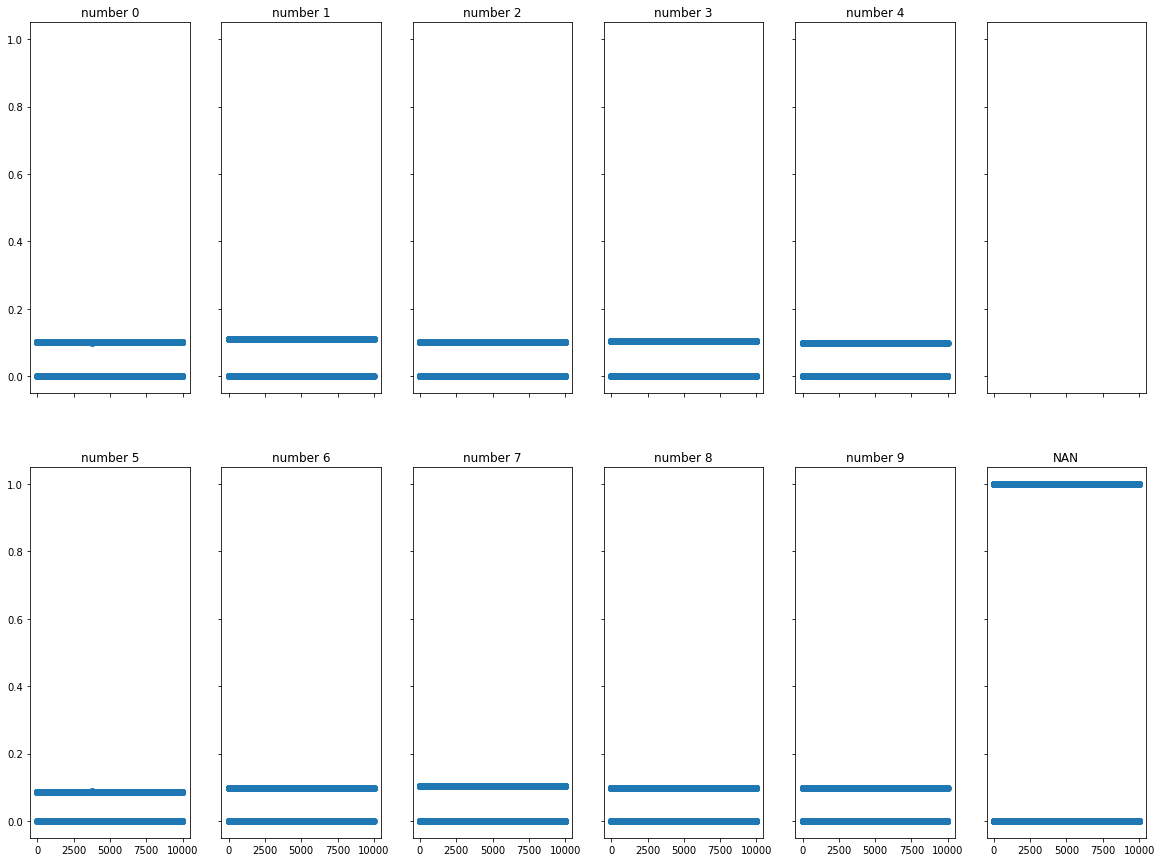

[   0  859    0    0    0    0    0    0    0    0 2340 7644]
[ 742  859  781  779  749  672  739  801  750  772 2340 7644]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


In [ ]:
import matplotlib.pyplot as plt
tp=np.array([0]*12)
tot=np.array([0]*12)
no_0 = np.array([])
no_1 = np.array([])
no_2 = np.array([])
no_3 = np.array([])
no_4 = np.array([])
no_5 = np.array([])
no_6 = np.array([])
no_7 = np.array([])
no_8 = np.array([])
no_9 = np.array([])
no_10 = np.array([])

for images,labels in gantrainer.val_loader:
      try:
        for i in range(1,16):
          images[4*i] = images[4*i] + images[4*i + 1]
          labels[4*i] = 10
      except:
        break
      imgs=images.to(gantrainer.device)
      labels=labels.cpu().numpy()
      with torch.no_grad():
        pred=gantrainer.attacker(gantrainer.enc(imgs)).cpu().numpy()
      p=pred
      no_0 = np.append(no_0,pred[:,0])
      no_1 = np.append(no_1,pred[:,1])
      no_2 = np.append(no_2,pred[:,2])
      no_3 = np.append(no_3,pred[:,3])
      no_4 = np.append(no_4,pred[:,4])
      no_5 = np.append(no_5,pred[:,5])
      no_6 = np.append(no_6,pred[:,6])
      no_7 = np.append(no_7,pred[:,7])
      no_8 = np.append(no_8,pred[:,8])
      no_9 = np.append(no_9,pred[:,9])
      no_10 = np.append(no_10,pred[:,10])

      pred =np.argmax(pred,1)
      for i in range(11):
        tot[i]+=sum(labels==i)
        tp[i]+=sum(pred[labels==i]==i)
      tot[11]+=sum(labels!=10)
      tp[11]+=sum(pred[labels!=10]!=10)
      # pred=np.expand_dims(pred,1)
      # labels = np.expand_dims(labels,1)
      # print(pred.shape)
      # print(labels.shape)
      # out=np.concatenate((pred,labels,p),1)
      # print(out)
      #break
fig,ax = plt.subplots(2,6,figsize=(20,15),sharex=True,sharey=True)

ax[0][0].plot(no_0,'o')
ax[0][1].plot(no_1,'o')
ax[0][2].plot(no_2,'o')
ax[0][3].plot(no_3,'o')
ax[0][4].plot(no_4,'o')
ax[1][0].plot(no_5,'o')
ax[1][1].plot(no_6,'o')
ax[1][2].plot(no_7,'o')
ax[1][3].plot(no_8,'o')
ax[1][4].plot(no_9,'o')
ax[1][5].plot(no_10,'o')
ax[0][0].set_title("number 0")
ax[0][1].set_title("number 1")
ax[0][2].set_title("number 2")
ax[0][3].set_title("number 3")
ax[0][4].set_title("number 4")
ax[1][0].set_title("number 5")
ax[1][1].set_title("number 6")
ax[1][2].set_title("number 7")
ax[1][3].set_title("number 8")
ax[1][4].set_title("number 9")
ax[1][5].set_title("NAN")
plt.show()


print(tp)
print(tot)
print(tp/tot)

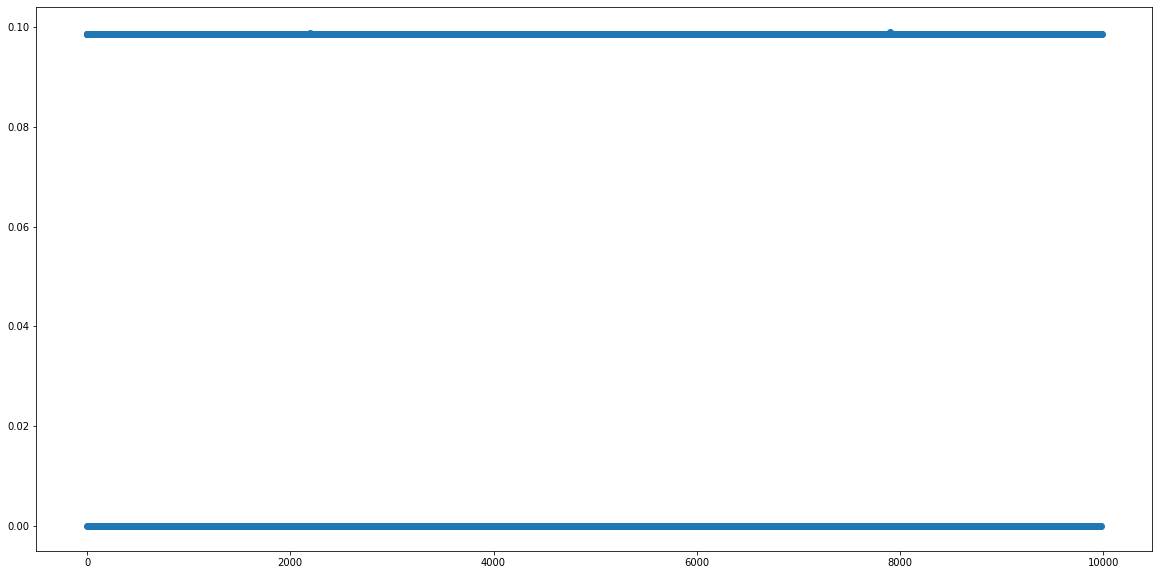

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_0,'o')

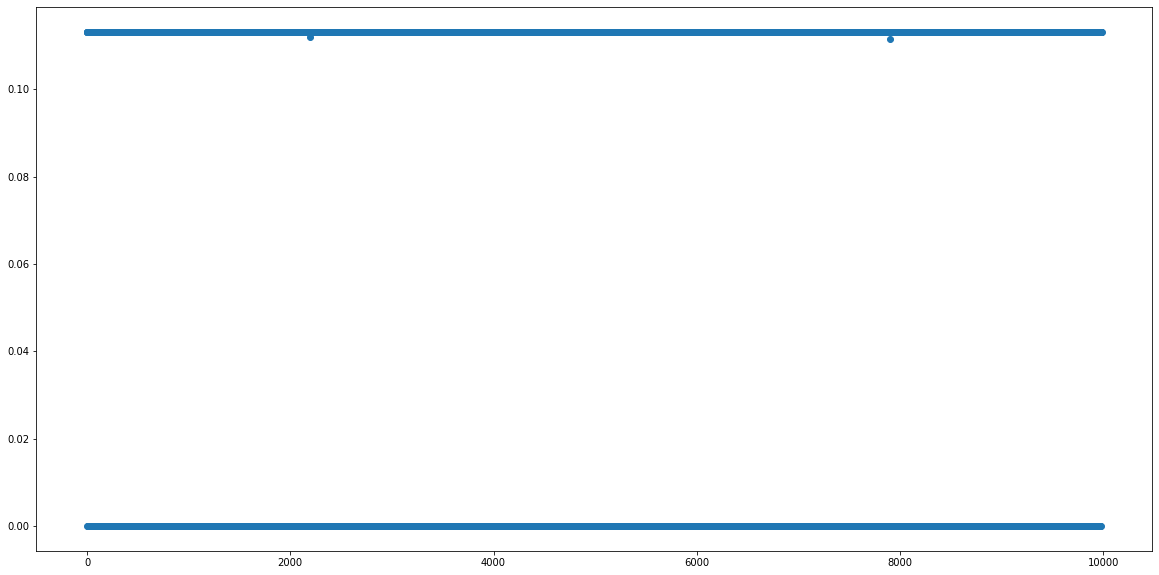

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_1,'o')

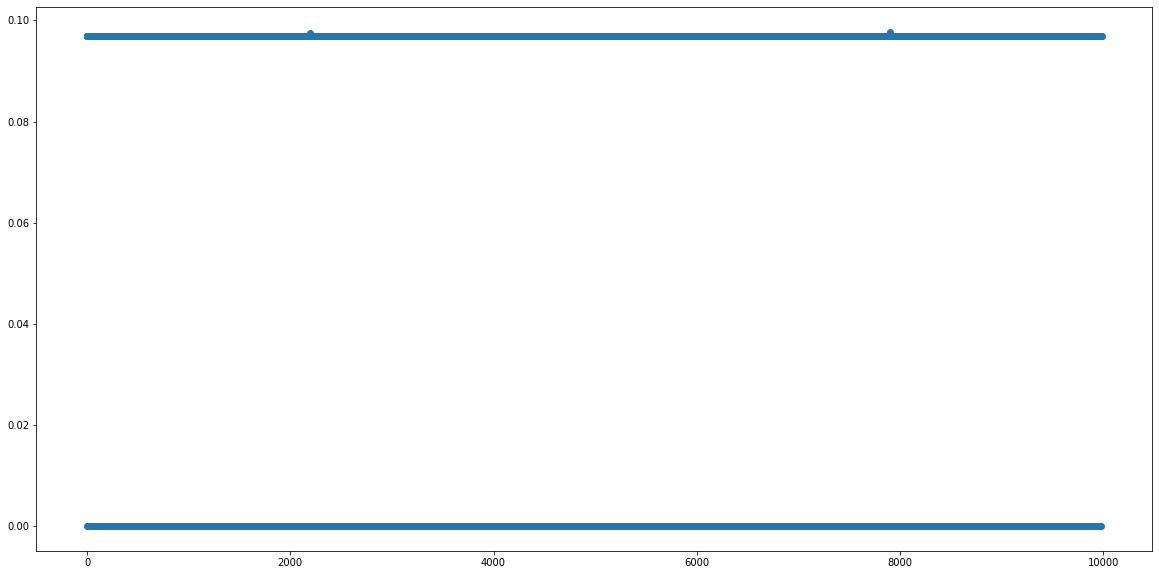

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_2,'o')

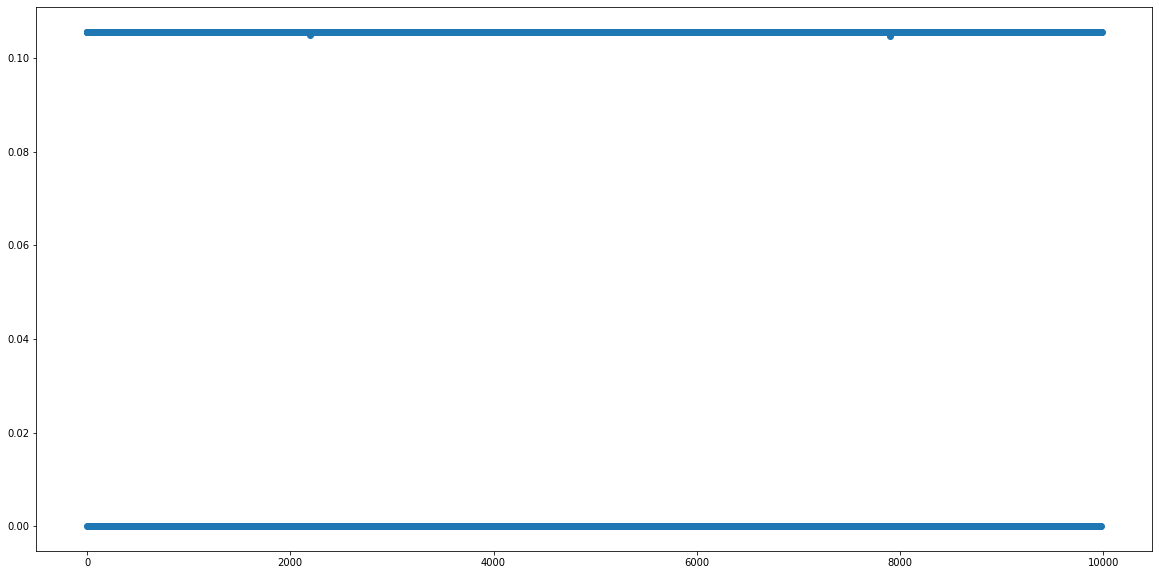

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_3,'o')

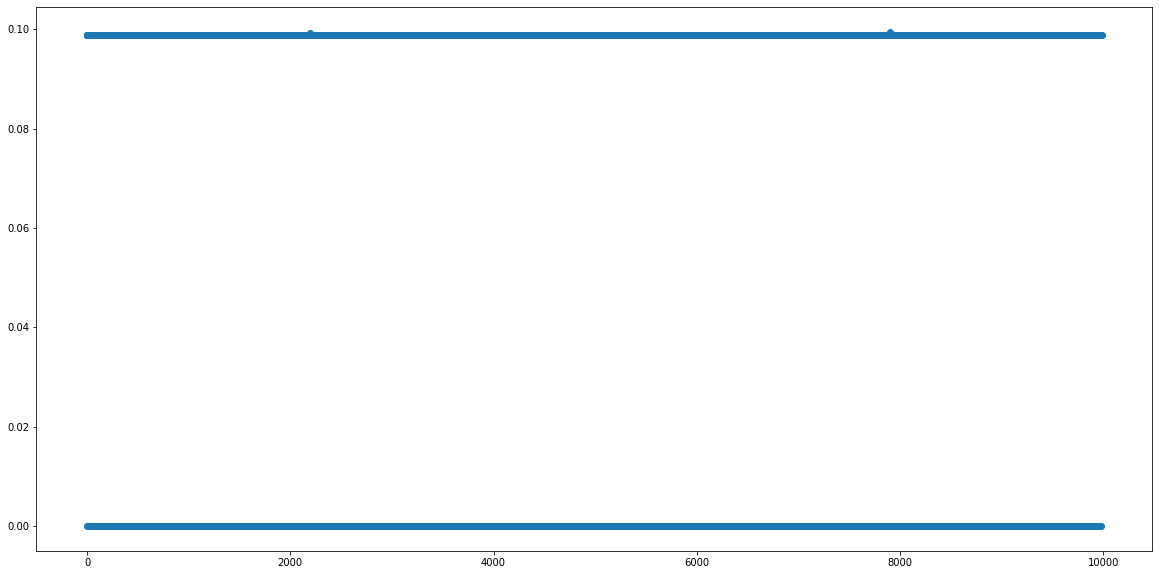

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_4,'o')

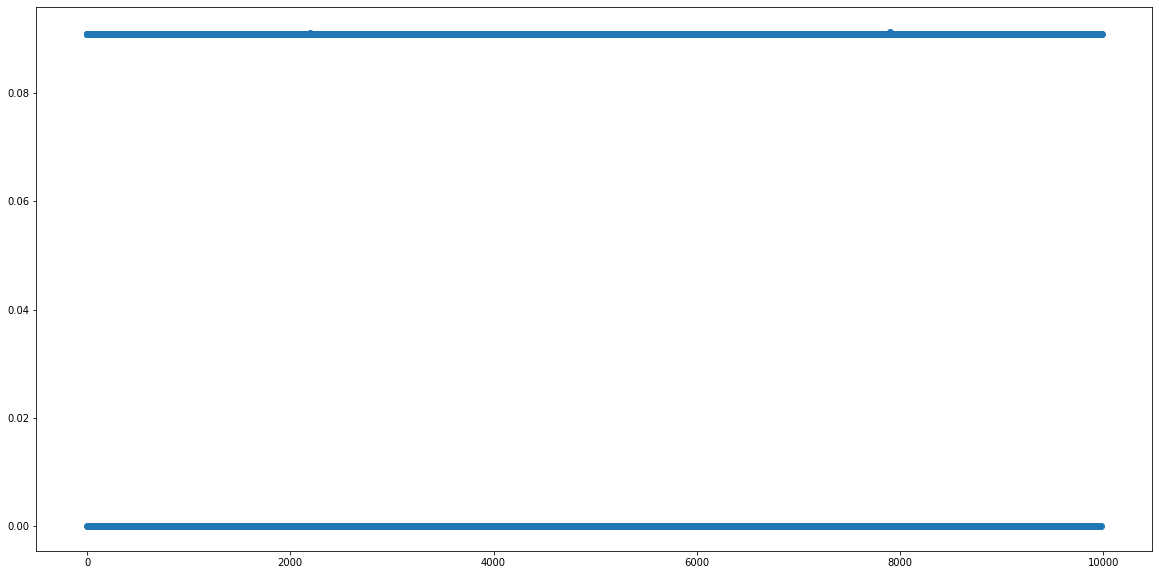

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_5,'o')

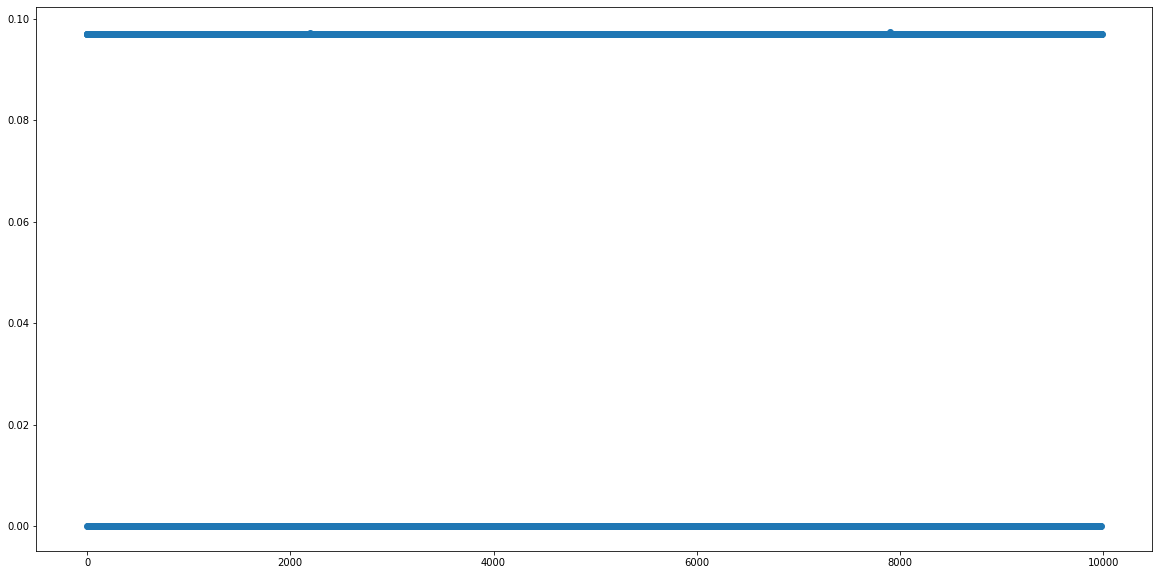

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_6,'o')

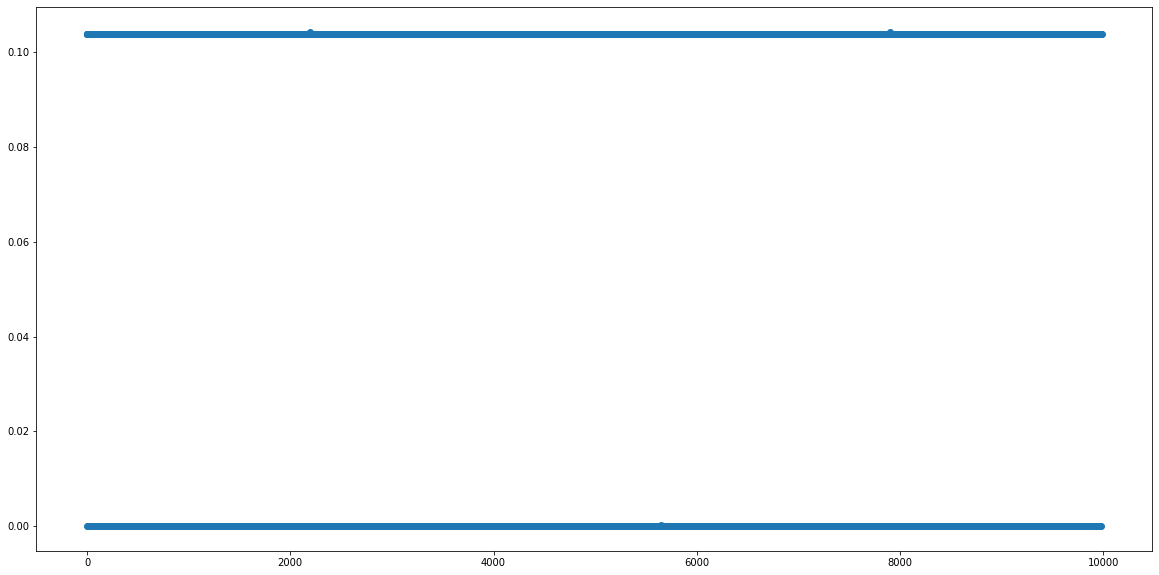

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_7,'o')

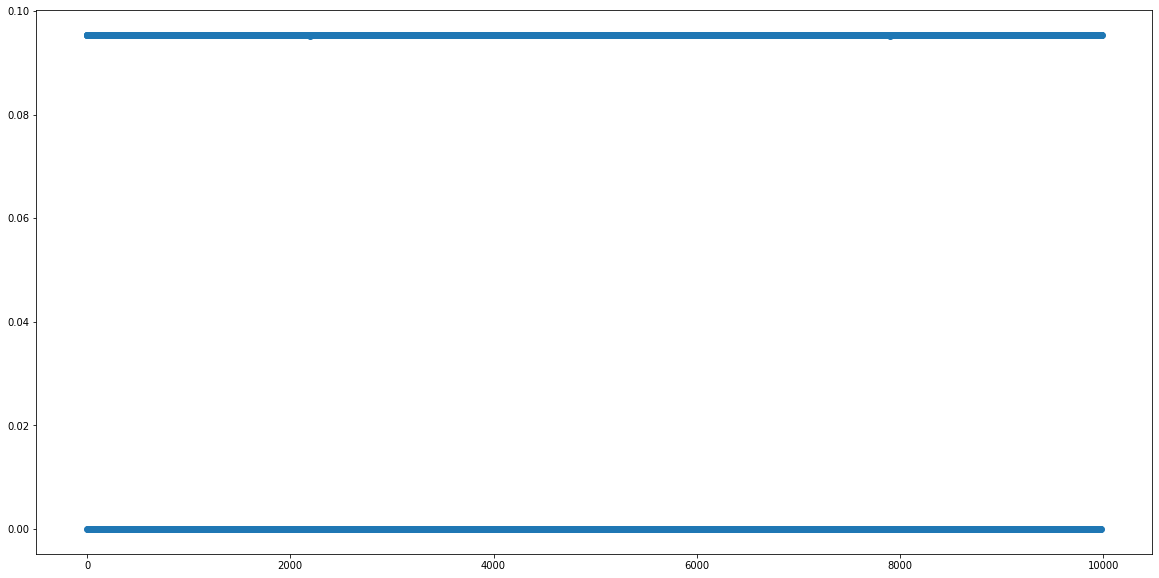

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_8,'o')

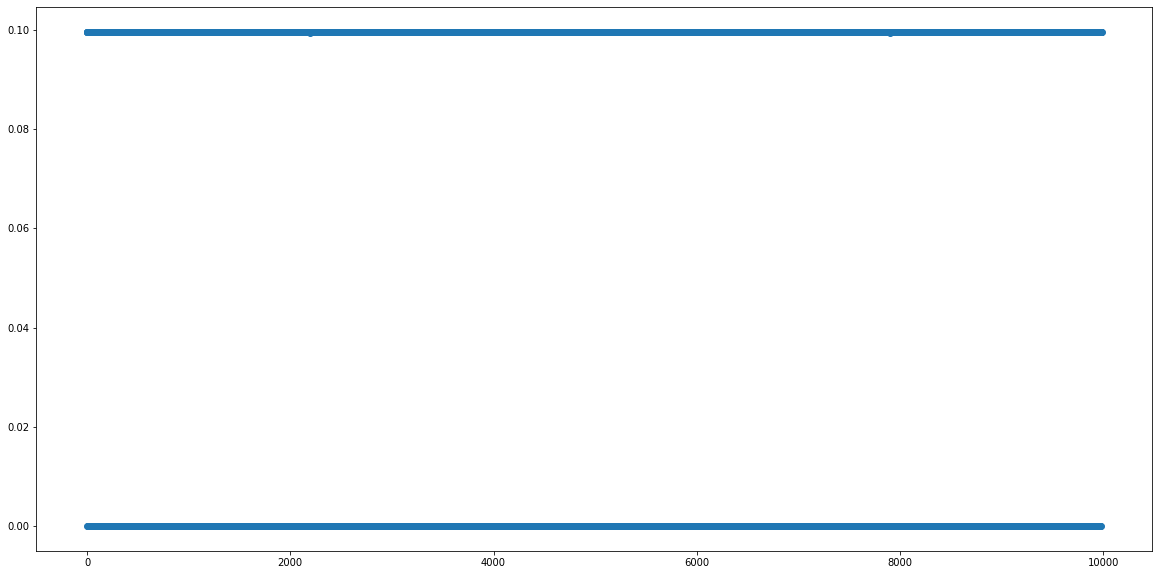

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_9,'o')

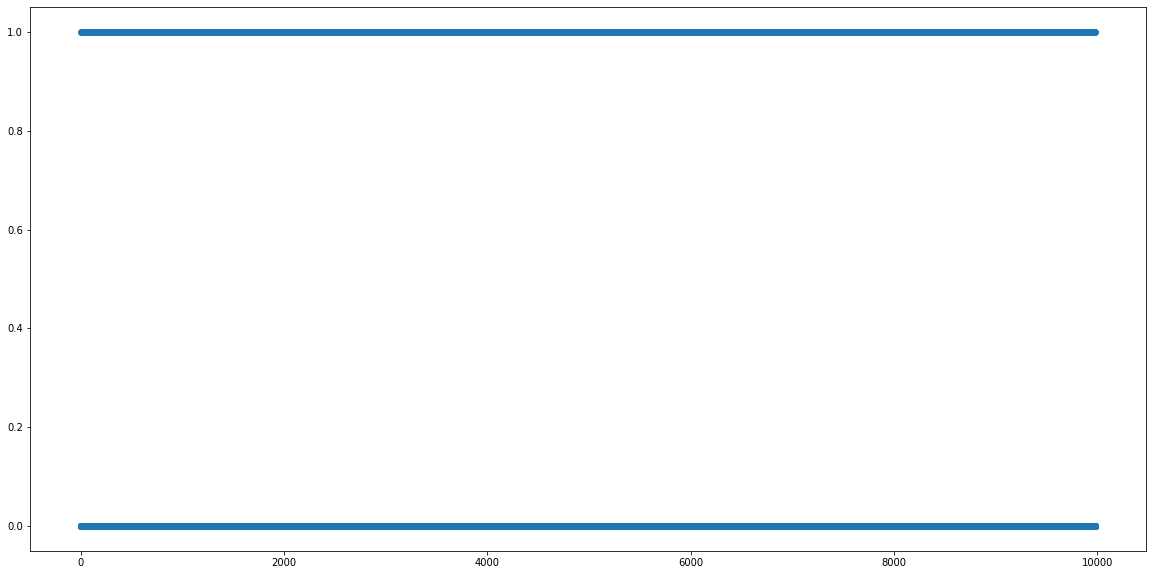

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(no_10,'o')